In [0]:
import numpy as np
from scipy.special import xlogy
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [0]:
def relu(Z):

  """Applies relu function to an array/value

    Arguments
    ---------
    Z: float/int/array_like
      Original Value

    Returns
    -------
    A: same shape as input
      Value after applying relu function
  """
  
  return np.maximum(Z, 0)

In [0]:
def relu_prime(Z):
  
  """Applies differentiation of relu function to an array/value

    Arguments
    ---------
    Z: float/int/array_like
      Original Value

    Returns
    -------
    A: same shape as input
      Value after applying diff of relu function
  """

  return (Z>0).astype(Z.dtype)

In [0]:
def sigmoid(Z):

  """Applies sigmoid function to an array/value

    Arguments
    ---------
    Z: float/int/array_like
      Original Value

    Returns
    -------
    A: same shape as input
      Value after applying sigmoid function
  """    
  
  return 1/(1+np.power(np.e, -Z))

In [0]:
def sigmoid_prime(Z):

  """Applies differentiation of sigmoid function to an array/value

    Arguments
    ---------
    Z: float/int/array_like
      Original Value

    Returns
    -------
    A: same shape as input
      Value after applying diff of sigmoid function
  """
  
  return (1-np.power(Z, 2))

In [0]:
def leaky_relu(Z, alpha=0.01):

  """Applies leaky relu function to an array/value

    Arguments
    ---------
    Z: float/int/array_like
      Original Value
    alpha: float
      Negative slope coefficient

    Returns
    -------
    A: same shape as input
      Value after applying leaky relu function
  """   

  return np.where(Z > 0, Z, Z * alpha)

In [0]:
def leaky_relu_prime(Z, alpha=0.01):

  """Applies differentiation of leaky relu function to an array/value

    Arguments
    ---------
    Z: float/int/array_like
      Original Value
    alpha: float
      Negative slope coefficient

    Returns
    -------
    A: same shape as input
      Value after applying diff of leaky relu function
  """

  dz = np.ones_like(Z)
  dz[Z < 0] = alpha
  return dz

In [0]:
def tanh(Z):

  """Applies tanh function to an array/value

    Arguments
    ---------
    Z: float/int/array_like
      Original Value

    Returns
    -------
    A: same shape as input
      Value after applying tanh function
  """   

  return np.tanh(Z)

In [0]:
def tanh_prime(Z):
  
  """Applies differentiation of tanh function to an array/value

    Arguments
    ---------
    Z: float/int/array_like
      Original Value

    Returns
    -------
    A: same shape as input
      Value after applying diff of tanh function
  """

  return 1-(tanh(Z)**2)

In [0]:
def get_activation_function(name):

  """Returns function corresponding to an activation name

    Arguments
    ---------
    name: string
      'relu', 'leaky_relu', 'tanh' or 'sigmoid' activation

    Returns
    -------
    Corresponding activation function
  """

  if name=='relu':
    return relu
  elif name=='sigmoid':
    return sigmoid
  elif name=='leaky_relu':
    return leaky_relu
  elif name=='tanh':
    return tanh
  else:
    raise ValueError('Only "relu", "leaky_relu", "tanh" and "sigmoid" supported')

In [0]:
def get_derivative_activation_function(name):

  """Returns differentiation function corresponding to an activation name

  Arguments
  ---------
  name: string
    'relu', 'leaky_relu', 'tanh' or 'sigmoid' activation

  Returns
  -------
  Corresponding diff of activation function
  """

  if name=='relu':
    return relu_prime
  elif name=='sigmoid':
    return sigmoid_prime
  elif name=='leaky_relu':
    return leaky_relu_prime
  elif name=='tanh':
    return tanh_prime
  else:
    raise ValueError('Only "relu", "leaky_relu", "tanh" and "sigmoid" supported')

In [0]:
def initialize_nn(X, y, hidden_nodes=4, random_state=None):

  """Initializes random weights and bias

  Arguments
  ---------
  X: array-like
    Train Features
  y: array-like
    Train Labels
  hidden_nodes: int
    Number of nodes in hidden layer
  random_state: int
    Random seed

  Returns
  -------
  dict
    Contains the randomly initialized weights and bias arrays

    The keys for weights and bias arrays in the dict are 'W1', 'b1', 'W2' and 'b2'
  """

  if random_state != None:
    np.random.seed(random_state)

  n_x = X.shape[1]
  n_h = hidden_nodes
  n_y = y.shape[1]

  W1 = np.random.randn(n_x, n_h)# * np.sqrt(1./n_h)
  b1 = np.zeros((1, n_h))
  W2 = np.random.randn(n_h, n_y)# * np.sqrt(1./n_y)
  b2 = np.zeros((1, n_y))

  params = {
      'W1' : W1,
      'b1' : b1,
      'W2' : W2,
      'b2' : b2
  }

  return params

In [0]:
def forward_prop(X, nn_params, activation='relu'):

  """Performs forward propagation and calculates output value

    Arguments
    ---------
    X: array_like
      Data
    nn_params: dictionary
      Parameter dict contaning weights and biases
    activation: string
      'relu' or 'tanh' activation

    Returns
    -------
    dict
      Dictionary contaning Z's and A's
  """

  W1 = nn_params['W1']
  b1 = nn_params['b1']
  W2 = nn_params['W2']
  b2 = nn_params['b2']

  Z1 = np.dot(X, W1) + b1    # X.W1+b1 because we have taken rows as a record and columns as features

  A1 = get_activation_function(activation)(Z1)

  Z2 = np.dot(A1, W2) + b2
  A2 = get_activation_function('sigmoid')(Z2)

  result = {
      'Z1': Z1,
      'A1': A1,
      'Z2': Z2,
      'A2': A2
  }

  return result

In [0]:
def calculate_loss(A2, y):

  """Calculate the entropy loss

    Arguments
    ---------
    A2: array_like
      Output of the last layer 
    y: array-like
      True lables

    Returns
    -------
    loss: float
      Entropy loss
  """

  m = y.shape[0]
  return np.squeeze(-(1./m)*np.sum(np.multiply(y, np.log(A2))+np.multiply(np.log(1-A2), 1-y)))     # Squeeze will convert [[cost]] to 'cost' float variable

In [0]:
def backward_prop(X, y, nn_params, cache, learning_rate=0.001, activation='relu'):
  
  """Performs forward propagation and calculates output value for a layer

    Arguments
    ---------
    X: array_like
      Data
    y: array_like
      True labels
    cache: dictionary
      Dictionary containing 'z' and 'a'

    Returns
    -------
    dict
      Dictionary containing gradients 'dz', 'dw' and 'db'
  """

  W1 = nn_params['W1']
  b1 = nn_params['b1']
  W2 = nn_params['W2']
  b2 = nn_params['b2']

  Z1 = cache['Z1']
  A1 = cache['A1']
  Z2 = cache['Z2']
  A2 = cache['A2']

  m = X.shape[0]

  dz2 = A2 - y
  dw2 = (1./m)*np.dot(A1.T, dz2)
  db2 = (1./m)*np.sum(dz2, axis=0, keepdims=True)

  dz1 = np.dot(dz2, W2.T) * get_derivative_activation_function(activation)(A1)

  dw1 = (1./m)*np.dot(X.T, dz1)
  db1 = (1./m)*np.sum(dz1, axis=0, keepdims=True)

  updates = {
    'dw1': dw1,
    'db1': db1,
    'dw2': dw2,
    'db2': db2
  }

  return updates

In [0]:
def update_weights(nn_params, updates, learning_rate=0.01):

  """Performs forward propagation and calculates output value for a layer

    Arguments
    ---------
    nn_params: dict
      Dictionary containing weights and biases
    updates: dict
      Dictionary containing 'dw' and 'db'
    learning_rate: int, float
      Learning rate for the weight update

    Returns
    -------
    dict
      Dictionary containing updated weights and biases

      The keys for weights and bias arrays in the dict are 'W1', 'b1', 'W2' and 'b2'
  """

  W1 = nn_params['W1']
  b1 = nn_params['b1']
  W2 = nn_params['W2']
  b2 = nn_params['b2']

  dw1 = updates['dw1']
  db1 = updates['db1']
  dw2 = updates['dw2']
  db2 = updates['db2']

  W1 = W1 - learning_rate*dw1
  b1 = b1 - learning_rate*db1
  W2 = W2 - learning_rate*dw2
  b2 = b2 - learning_rate*db2

  final_result = {
      'W1': W1,
      'b1': b1,
      'W2': W2,
      'b2': b2
  }

  return final_result

In [0]:
def predict(parameters, X, y):

    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments
    ---------
    parameters: dict
      Dictionary containing weights and biases
    X: array_like
      Data
    y: array_like
      True Labels
    
    Returns
    -------
    predictions: array_like
      Vector of predictions of our model
    """
    
    cache = forward_prop(X, parameters, 'relu')
    predictions = cache['A2'] > 0.5
    
    return predictions

In [0]:
def plot_decision_boundary(model, X, y):

    """
    Plots decision boundary for a dataset and model
    
    Arguments
    ---------
    model: function
      Function for getting predictions
    X: array_like
      Data
    y: array_like
      True Labels
    """

    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

In [0]:
noisy_moons = make_moons(n_samples=1000, noise=0.1, random_state=0)

In [0]:
X, y = noisy_moons
y = y.reshape(-1, 1)

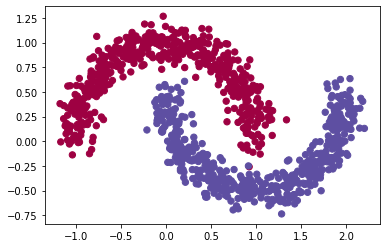

In [21]:
# Visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

In [22]:
print(X.shape)
print(y.shape)

(1000, 2)
(1000, 1)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [0]:
epochs = 10000
learning_rate = 0.01
hidden_nodes = 50

nn_params = initialize_nn(X, y, hidden_nodes=hidden_nodes, random_state=0)

In [25]:
history = []

for i in range(epochs+1):

  result = forward_prop(X_train, nn_params, 'relu')

  loss = calculate_loss(result['A2'], y_train)
  history.append(loss)

  updates = backward_prop(X_train, y_train, nn_params, result, learning_rate=0.01, activation='relu')

  nn_params = update_weights(nn_params, updates, learning_rate)

  if i%(epochs/10)==0:
    print('Epoch: {}\tLoss: {:.6f}\tTrain Accuracy: {:.3f}\tTest Accuracy: {:.3f}'.format(i, loss, accuracy_score(y_train, predict(nn_params, X_train, y_train)), accuracy_score(y_test, predict(nn_params, X_test, y_test))))

Epoch: 0	Loss: 1.854149	Train Accuracy: 0.493	Test Accuracy: 0.517
Epoch: 1000	Loss: 0.165817	Train Accuracy: 0.933	Test Accuracy: 0.917
Epoch: 2000	Loss: 0.119106	Train Accuracy: 0.969	Test Accuracy: 0.950
Epoch: 3000	Loss: 0.093612	Train Accuracy: 0.980	Test Accuracy: 0.963
Epoch: 4000	Loss: 0.076807	Train Accuracy: 0.984	Test Accuracy: 0.977
Epoch: 5000	Loss: 0.064912	Train Accuracy: 0.987	Test Accuracy: 0.980
Epoch: 6000	Loss: 0.055976	Train Accuracy: 0.991	Test Accuracy: 0.983
Epoch: 7000	Loss: 0.049052	Train Accuracy: 0.993	Test Accuracy: 0.983
Epoch: 8000	Loss: 0.043558	Train Accuracy: 0.994	Test Accuracy: 0.990
Epoch: 9000	Loss: 0.039085	Train Accuracy: 0.994	Test Accuracy: 0.997
Epoch: 10000	Loss: 0.035419	Train Accuracy: 0.996	Test Accuracy: 0.997


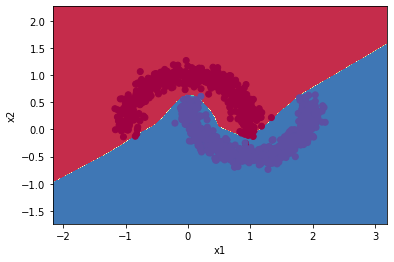

In [26]:
# Plotting whole data

plot_decision_boundary(lambda x: predict(nn_params, x, y), X.T, y.T)

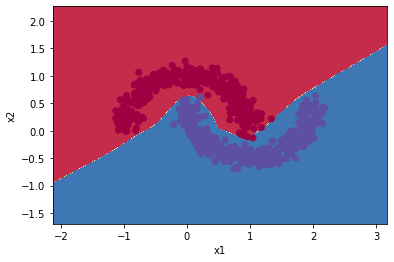

In [27]:
# Plotting train data

plot_decision_boundary(lambda x: predict(nn_params, x, y), X_train.T, y_train.T)

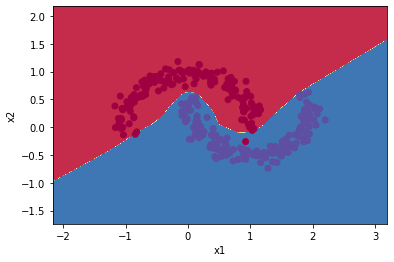

In [28]:
# Plotting test data

plot_decision_boundary(lambda x: predict(nn_params, x, y), X_test.T, y_test.T)